# setup

In [1]:
import os

if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('..')

In [2]:
import h5py
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from tqdm import tqdm

# init

In [3]:
hdf5_path = '/home/josegfer/datasets/ningbo/ningbo.h5'
metadata_path = '/home/josegfer/datasets/ningbo/metadata.csv'

In [4]:
val_size = 0.10
tst_size = 0.05

In [5]:
exam_id_col = 'exam_id'

# draft

In [6]:
metadata = pd.read_csv(metadata_path)
metadata

,exam_id,1AVB,2AVB,2AVB1,2AVB2,3AVB,ABI,ALS,APB,AQW,...,AEC,BPAC,SAr,SPPB,PTW,JT,BS,AJR,SPRS,LAH
0,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,5,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,6,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45147,45547,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45148,45548,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45149,45549,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45150,45550,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
labels = metadata.columns[1:]
N = len(metadata)
soma = []
for coluna, label in enumerate(labels):
    soma.append([coluna, np.sum(metadata[label].values) / N])
soma = np.array(soma)

In [8]:
soma

array([[0.00000000e+00, 2.52480510e-02],
       [1.00000000e+00, 1.46172927e-03],
       [2.00000000e+00, 6.86569809e-04],
       [3.00000000e+00, 0.00000000e+00],
       [4.00000000e+00, 1.68320340e-03],
       [5.00000000e+00, 6.64422395e-05],
       [6.00000000e+00, 3.42177534e-02],
       [7.00000000e+00, 2.90574061e-02],
       [8.00000000e+00, 2.35427002e-02],
       [9.00000000e+00, 1.88917434e-02],
       [1.00000000e+01, 5.55900071e-03],
       [1.10000000e+01, 3.58788094e-03],
       [1.20000000e+01, 1.68320340e-03],
       [1.30000000e+01, 8.10595322e-03],
       [1.40000000e+01, 6.64422395e-05],
       [1.50000000e+01, 1.70756556e-02],
       [1.60000000e+01, 1.66105599e-03],
       [1.70000000e+01, 2.43621545e-04],
       [1.80000000e+01, 1.02763997e-02],
       [1.90000000e+01, 1.33903260e-01],
       [2.00000000e+01, 3.57237775e-02],
       [2.10000000e+01, 0.00000000e+00],
       [2.20000000e+01, 0.00000000e+00],
       [2.30000000e+01, 4.54021970e-03],
       [2.400000

In [9]:
np.max(soma[:, 1])

0.3668718993621545

In [10]:
crescente = np.argsort(soma[:, 1])
decrescente = np.flip(crescente)
decrescente

array([45, 46, 49, 48, 34, 19, 32, 35, 50, 47, 28, 30, 20,  6, 40,  7, 57,
        0,  8,  9, 31, 15, 51, 63, 18, 26, 59, 60, 13, 52, 10, 58, 23, 33,
       11, 38, 25, 56, 36, 39, 29, 61, 64, 12,  4, 16, 27, 44,  1, 71, 62,
       66, 24, 72,  2, 54, 75, 78, 70, 53, 65, 41, 77, 17, 73, 79, 42, 67,
       55, 69, 74, 76, 14,  5, 37, 43, 68, 21, 22,  3])

In [11]:
soma[decrescente, :]

array([[4.50000000e+01, 3.66871899e-01],
       [4.60000000e+01, 1.79947732e-01],
       [4.90000000e+01, 1.78508150e-01],
       [4.80000000e+01, 1.60679483e-01],
       [3.40000000e+01, 1.55984231e-01],
       [1.90000000e+01, 1.33903260e-01],
       [3.20000000e+01, 1.19374557e-01],
       [3.50000000e+01, 6.37181077e-02],
       [5.00000000e+01, 5.64759036e-02],
       [4.70000000e+01, 4.41840893e-02],
       [2.80000000e+01, 4.40954996e-02],
       [3.00000000e+01, 3.69418852e-02],
       [2.00000000e+01, 3.57237775e-02],
       [6.00000000e+00, 3.42177534e-02],
       [4.00000000e+01, 3.06741673e-02],
       [7.00000000e+00, 2.90574061e-02],
       [5.70000000e+01, 2.61782424e-02],
       [0.00000000e+00, 2.52480510e-02],
       [8.00000000e+00, 2.35427002e-02],
       [9.00000000e+00, 1.88917434e-02],
       [3.10000000e+01, 1.77400780e-02],
       [1.50000000e+01, 1.70756556e-02],
       [5.10000000e+01, 1.60347271e-02],
       [6.30000000e+01, 1.44844082e-02],
       [1.800000

In [12]:
np.cumsum(soma[decrescente, 1]) # tem multiclass ne

array([0.3668719 , 0.54681963, 0.72532778, 0.88600726, 1.0419915 ,
       1.17589476, 1.29526931, 1.35898742, 1.41546332, 1.45964741,
       1.50374291, 1.5406848 , 1.57640858, 1.61062633, 1.6413005 ,
       1.6703579 , 1.69653614, 1.7217842 , 1.7453269 , 1.76421864,
       1.78195872, 1.79903437, 1.8150691 , 1.82955351, 1.83982991,
       1.84848955, 1.8570163 , 1.86543232, 1.87353827, 1.88047041,
       1.88602941, 1.89079111, 1.89533133, 1.89922927, 1.90281715,
       1.90616141, 1.90930634, 1.91238483, 1.91539688, 1.91796598,
       1.9204022 , 1.92281627, 1.92516389, 1.92684709, 1.9285303 ,
       1.93019135, 1.93178597, 1.93338058, 1.93484231, 1.93621545,
       1.93752215, 1.93882884, 1.93998051, 1.94071137, 1.94139794,
       1.94197378, 1.94250532, 1.94301471, 1.94339121, 1.94374557,
       1.94405563, 1.9443214 , 1.94458717, 1.94483079, 1.94503012,
       1.94522945, 1.94540663, 1.94556166, 1.94571669, 1.94582743,
       1.94593816, 1.9460489 , 1.94611534, 1.94618179, 1.94624

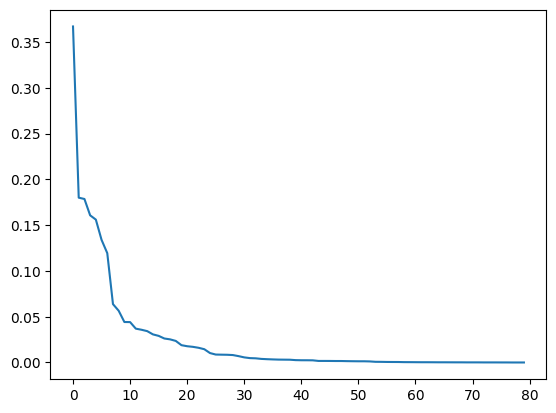

In [13]:
plt.plot(soma[decrescente, 1]); # 5% de corte ta bom?

In [14]:
tol = 0.01
len(soma[soma[:, 1] > tol, :]), soma[soma[:, 1] > tol, :]

(25,
 array([[0.00000000e+00, 2.52480510e-02],
        [6.00000000e+00, 3.42177534e-02],
        [7.00000000e+00, 2.90574061e-02],
        [8.00000000e+00, 2.35427002e-02],
        [9.00000000e+00, 1.88917434e-02],
        [1.50000000e+01, 1.70756556e-02],
        [1.80000000e+01, 1.02763997e-02],
        [1.90000000e+01, 1.33903260e-01],
        [2.00000000e+01, 3.57237775e-02],
        [2.80000000e+01, 4.40954996e-02],
        [3.00000000e+01, 3.69418852e-02],
        [3.10000000e+01, 1.77400780e-02],
        [3.20000000e+01, 1.19374557e-01],
        [3.40000000e+01, 1.55984231e-01],
        [3.50000000e+01, 6.37181077e-02],
        [4.00000000e+01, 3.06741673e-02],
        [4.50000000e+01, 3.66871899e-01],
        [4.60000000e+01, 1.79947732e-01],
        [4.70000000e+01, 4.41840893e-02],
        [4.80000000e+01, 1.60679483e-01],
        [4.90000000e+01, 1.78508150e-01],
        [5.00000000e+01, 5.64759036e-02],
        [5.10000000e+01, 1.60347271e-02],
        [5.70000000e+01, 2.61

In [15]:
tol = 0.05
len(soma[soma[:, 1] > tol, :]), soma[soma[:, 1] > tol, :]

(9,
 array([[19.        ,  0.13390326],
        [32.        ,  0.11937456],
        [34.        ,  0.15598423],
        [35.        ,  0.06371811],
        [45.        ,  0.3668719 ],
        [46.        ,  0.17994773],
        [48.        ,  0.16067948],
        [49.        ,  0.17850815],
        [50.        ,  0.0564759 ]]))

In [16]:
labels[np.array(soma[soma[:, 1] > tol, 0], dtype = int)]

Index(['LVH', 'STTC', 'TWC', 'TWO', 'SB', 'SR', 'ST', 'AF', 'SA'], dtype='object')

In [17]:
labels

Index(['1AVB', '2AVB', '2AVB1', '2AVB2', '3AVB', 'ABI', 'ALS', 'APB', 'AQW',
       'ARS', 'AVB', 'CCR', 'CR', 'ERV', 'FQRS', 'NSIVCB', 'JEB', 'JPT',
       'LBBB', 'LVH', 'LVQRSAL', 'LVQRSCL', 'LVQRSLL', 'MI', 'PRIE', 'PWC',
       'QTIE', 'RAH', 'RBBB', 'RVH', 'STDD', 'STE', 'STTC', 'STTU', 'TWC',
       'TWO', 'UW', 'VB', 'VEB', 'VFW', 'VPB', 'VPE', 'VET', 'WAP', 'WPW',
       'SB', 'SR', 'AFIB', 'ST', 'AF', 'SA', 'SVT', 'AT', 'AVNRT', 'AVRT',
       'AA', 'ER', 'RfAP', 'TPW', 'BBB', 'LAFB', 'PVT', 'AD', 'CCVCL', 'PPW',
       'AIVR', 'VFIB', 'VF', 'SQTS', 'SAB', 'AEC', 'BPAC', 'SAr', 'SPPB',
       'PTW', 'JT', 'BS', 'AJR', 'SPRS', 'LAH'],
      dtype='object')

# loader

In [18]:
from torch.utils.data import Dataset

In [19]:
class NINGBO():
    def __init__(self, hdf5_path = '/home/josegfer/datasets/ningbo/ningbo.h5', 
                 metadata_path = '/home/josegfer/datasets/ningbo/metadata.csv', 
                 val_size = 0.1, tst_size = 0.05):
        self.hdf5_file = h5py.File(hdf5_path, "r")
        self.metadata = pd.read_csv(metadata_path)

        self.val_size = val_size
        self.tst_size = tst_size

        trn_metadata, val_metadata, tst_metadata = self.split()
        self.check_dataleakage(trn_metadata, val_metadata, tst_metadata)
        
        self.trn_idx_dict = self.get_idx_dict(trn_metadata)
        self.val_idx_dict = self.get_idx_dict(val_metadata)
        self.tst_idx_dict = self.get_idx_dict(tst_metadata)

    def split(self, patient_id_col = 'exam_id'): # im assuming all pacient are unique for this dataset!
        patient_ids = self.metadata[patient_id_col].unique()

        num_trn = int(len(patient_ids) * (1 - self.tst_size - self.val_size))
        num_val = int(len(patient_ids) * self.val_size)

        trn_ids = set(patient_ids[:num_trn])
        val_ids = set(patient_ids[num_trn : num_trn + num_val])
        tst_ids = set(patient_ids[num_trn + num_val :])

        trn_metadata = self.metadata.loc[self.metadata[patient_id_col].isin(trn_ids)]
        val_metadata = self.metadata.loc[self.metadata[patient_id_col].isin(val_ids)]
        tst_metadata = self.metadata.loc[self.metadata[patient_id_col].isin(tst_ids)]

        return trn_metadata, val_metadata, tst_metadata
    
    def check_dataleakage(self, trn_metadata, val_metadata, tst_metadata, exam_id_col = 'exam_id'):
        trn_ids = set(trn_metadata[exam_id_col].unique())
        val_ids = set(val_metadata[exam_id_col].unique())
        tst_ids = set(tst_metadata[exam_id_col].unique())
        assert (len(trn_ids.intersection(val_ids)) == 0), "Some IDs are present in both train and validation sets."
        assert (len(trn_ids.intersection(tst_ids)) == 0), "Some IDs are present in both train and test sets."
        assert (len(val_ids.intersection(tst_ids)) == 0), "Some IDs are present in both validation and test sets."

    def get_idx_dict(self, split_metadata, exam_id_col = 'exam_id'):
        split_exams, split_h5_idx, temp = np.intersect1d(self.hdf5_file[exam_id_col], split_metadata[exam_id_col].values, return_indices = True)
        split_csv_idx = split_metadata.iloc[temp].index.values
        split_idx_dict = {exam_id_col: split_exams, 'h5_idx': split_h5_idx, 'csv_idx': split_csv_idx}

        print('checking exam_id consistency in idx dict')
        for idx, exam_id in tqdm(enumerate(split_idx_dict[exam_id_col])):
            assert self.hdf5_file[exam_id_col][split_idx_dict['h5_idx'][idx]] == exam_id
            assert self.metadata[exam_id_col][split_idx_dict['csv_idx'][idx]] == exam_id
        return split_idx_dict


In [20]:
data = NINGBO()

800it [00:00, 7998.12it/s]

checking exam_id consistency in idx dict


38379it [00:04, 8184.15it/s]
832it [00:00, 8318.40it/s]

checking exam_id consistency in idx dict


4515it [00:00, 8356.33it/s]
1691it [00:00, 8449.95it/s]

checking exam_id consistency in idx dict


2258it [00:00, 8427.26it/s]


In [21]:
class NINGBOsplit(Dataset):
    def __init__(self, database, split_idx_dict, 
                 tracing_col = 'tracings', exam_id_col = 'exam_id', output_col = ['LVH', 'STTC', 'TWC', 'TWO', 'SB', 'SR', 'ST', 'AF', 'SA']): # classes com min 5% de presença
        self.database = database
        self.split_idx_dict = split_idx_dict

        self.tracing_col = tracing_col
        self.exam_id_col = exam_id_col
        self.output_col = output_col
    
    def __len__(self):
        return len(self.split_idx_dict[self.exam_id_col])
    
    def __getitem__(self, idx):
        return {'X': self.database.hdf5_file[self.tracing_col][self.split_idx_dict['h5_idx'][idx]], 
                'y': self.database.metadata[self.output_col].loc[self.split_idx_dict['csv_idx'][idx]].values}

In [22]:
trn_ds = NINGBOsplit(data, data.trn_idx_dict)
val_ds = NINGBOsplit(data, data.val_idx_dict)
tst_ds = NINGBOsplit(data, data.tst_idx_dict)

In [23]:
trn_loader = torch.utils.data.DataLoader(trn_ds, batch_size = 128,
                                          shuffle = True, num_workers = 6)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size = 128,
                                          shuffle = False, num_workers = 6)
tst_loader = torch.utils.data.DataLoader(tst_ds, batch_size = 128,
                                          shuffle = False, num_workers = 6)

In [24]:
for batch in tqdm(trn_loader):
    break
batch['X'].shape, batch['X'], batch['y'].shape, batch['y']

  0%|          | 0/300 [00:11<?, ?it/s]


(torch.Size([128, 4096, 12]),
 tensor([[[-0.1132, -0.0728,  0.0403,  ...,  0.0883,  0.0266, -0.0437],
          [-0.1198, -0.0734,  0.0464,  ...,  0.1023,  0.0331, -0.0485],
          [-0.1009, -0.0574,  0.0435,  ...,  0.1139,  0.0421, -0.0518],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
 
         [[ 0.0529, -0.0522, -0.1051,  ..., -0.5798, -0.1218, -2.7423],
          [ 0.0588, -0.0599, -0.1187,  ..., -0.6652, -0.1415, -3.1461],
          [ 0.0592, -0.0570, -0.1163,  ..., -0.6333, -0.1316, -2.9960],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
 
         [[-0.0391, -0.1213, -0.0822,  ..., -0.1603, -0.1577, -0.0903]

In [25]:
for batch in tqdm(val_loader):
    break
batch['X'].shape, batch['X'], batch['y'].shape, batch['y']

  0%|          | 0/36 [00:04<?, ?it/s]


(torch.Size([128, 4096, 12]),
 tensor([[[-0.0481, -0.1136, -0.0655,  ..., -0.3478, -0.3125, -0.2176],
          [ 0.0366, -0.1081, -0.1447,  ..., -0.4081, -0.3735, -0.2817],
          [-0.0390, -0.1161, -0.0771,  ..., -0.3404, -0.3262, -0.2443],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
 
         [[-0.1350, -0.2889, -0.1540,  ..., -0.5062, -0.7149, -0.5299],
          [-0.2345, -0.3457, -0.1112,  ..., -0.6058, -0.9357, -0.6976],
          [-0.1901, -0.0863,  0.1038,  ..., -0.4847, -0.8294, -0.5914],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
 
         [[-0.0681, -0.0858, -0.0176,  ..., -0.1629, -0.1869, -0.1714]

In [26]:
for batch in tqdm(tst_loader):
    break
batch['X'].shape, batch['X'], batch['y'].shape, batch['y']

  0%|          | 0/18 [00:03<?, ?it/s]


(torch.Size([128, 4096, 12]),
 tensor([[[-0.3065, -0.1753,  0.1312,  ..., -1.6157, -1.1528, -0.8214],
          [-0.3027, -0.1807,  0.1219,  ..., -1.7051, -1.2165, -0.9537],
          [-0.2467, -0.2044,  0.0423,  ..., -1.4893, -1.0910, -0.7485],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
 
         [[-0.0694, -0.0877, -0.0183,  ..., -0.1580,  0.0705, -0.0704],
          [-0.0820, -0.1021, -0.0201,  ..., -0.1825,  0.0803, -0.0803],
          [-0.0741, -0.0948, -0.0207,  ..., -0.1714,  0.0775, -0.0771],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
 
         [[-0.5402, -0.0084,  0.5318,  ...,  0.1313, -0.2575, -0.1052]